# Image Classification (MobileNetV2, ImageNet)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will use a pre-trained [MobileNetV2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2) Tensorflow model to classify images. This model is trained using the [ImageNet](http://image-net.org/explore) dataset.

![image_classification_mobilenet_v2.png](../../demos/src/images/image_classification_mobilenet_v2.jpg)

## Importing dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pathlib](https://docs.python.org/3/library/pathlib.html) - for working with model files.

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

In [3]:
!pip install seaborn
!pip install scikit-learn

In [4]:
import tensorflow as tf
import platform
import pathlib

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# print('Python version:', platform.python_version())
# print('Tensorflow version:', tf.__version__)
# print('Keras version:', tf.keras.__version__)

In [5]:
# tf.test.gpu_device_name()

# Train & Test Directories 

In [6]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [7]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in ("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)))
        
        
test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in ("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)):
        test_non_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)))
    else:
        test_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)))

In [8]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

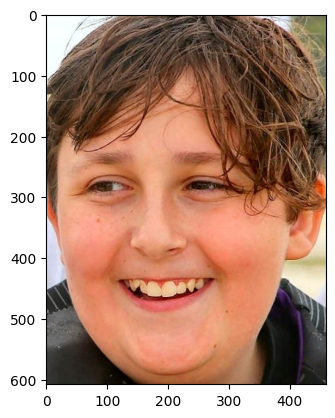

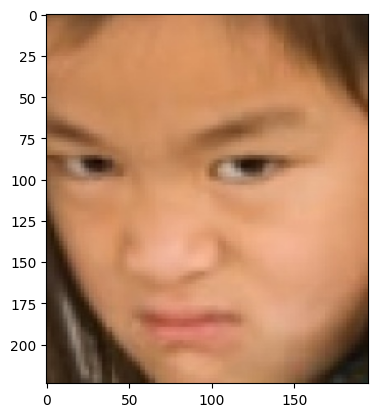

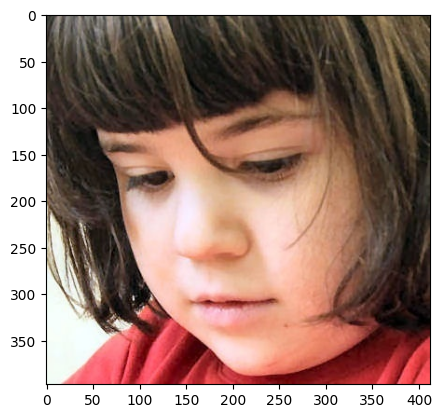

In [9]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [10]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)

# Validation Data

In [11]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [12]:
X_val, y_val = read_and_process_image(val_imgs)

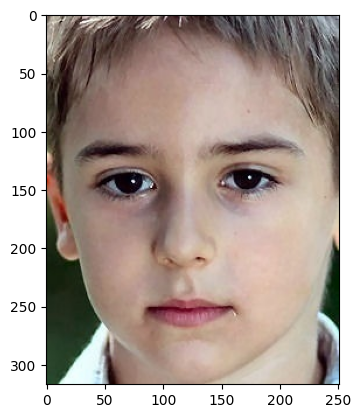

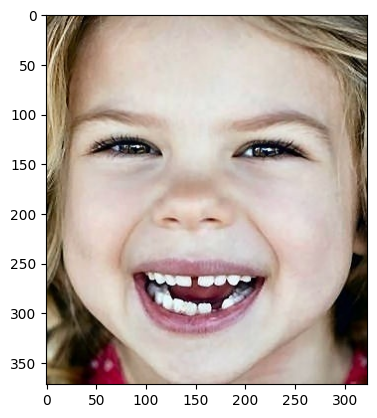

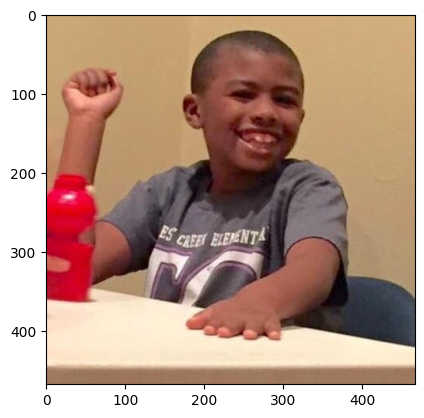

In [13]:
import matplotlib.image as mpimg
for ima in val_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Converting Train & Val Data To np Array


In [14]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Preprocess Train and Val data 

In [15]:
# # Preprocess the training data
# X_train_preprocessed = preprocess_input(X_train)

# # Preprocess the validation data
# X_val_preprocessed = preprocess_input(X_val)

# Shape Of Data

In [16]:
print("Shape of Train images:", X_train.shape)
print("Shape of Train labels:", y_train.shape)
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of Train images: (2540, 224, 224, 3)
Shape of Train labels: (2540,)
Shape of validation images: (100, 224, 224, 3)
Shape of validation labels: (100,)


In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Data Augmentation and Data Generators

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 4,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)


In [19]:
train_generator = train_datagen.flow(X_train, y_train, batch_size = 80)
val_generator = val_datagen.flow(X_val, y_val, batch_size = 80)

# Create MobileNetV2 Base Model

MobileNet v2 models for Keras: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [20]:
from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [21]:
batch_size = 80

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

learning_rate = 0.0001  # Adjust this to your desired learning rate
optimizer = Adam(learning_rate=learning_rate)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

## Analyzing the model

In [22]:
# model.summary()

# Customize Model

In [23]:
# model = Sequential()
# model.add(base_model)
# model.add(Flatten())
# model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Compile the Model

In [33]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
new_batch_size = 80

# Train the Model

In [35]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    batch_size= new_batch_size,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/100
32/32 [==============================] - 26s 688ms/step - loss: 0.5192 - accuracy: 0.7445 - val_loss: 0.5091 - val_accuracy: 0.7400
Epoch 2/100
32/32 [==============================] - 22s 690ms/step - loss: 0.5067 - accuracy: 0.7551 - val_loss: 0.5110 - val_accuracy: 0.7400
Epoch 3/100
32/32 [==============================] - 22s 694ms/step - loss: 0.5179 - accuracy: 0.7453 - val_loss: 0.5135 - val_accuracy: 0.7600
Epoch 4/100
32/32 [==============================] - 22s 692ms/step - loss: 0.5051 - accuracy: 0.7606 - val_loss: 0.5099 - val_accuracy: 0.7400
Epoch 5/100
32/32 [==============================] - 23s 710ms/step - loss: 0.5140 - accuracy: 0.7461 - val_loss: 0.5095 - val_accuracy: 0.7500
Epoch 6/100
32/32 [==============================] - 23s 708ms/step - loss: 0.4968 - accuracy: 0.7583 - val_loss: 0.5055 - val_accuracy: 0.7300
Epoch 7/100
32/32 [==============================] - 23s 709ms/step - loss: 0.5009 - accuracy: 0.7500 - val_loss: 0.5010 - val_accuracy:

32/32 [==============================] - 30s 899ms/step - loss: 0.4208 - accuracy: 0.8059 - val_loss: 0.4910 - val_accuracy: 0.7600
Epoch 58/100
32/32 [==============================] - 30s 911ms/step - loss: 0.4293 - accuracy: 0.8083 - val_loss: 0.5027 - val_accuracy: 0.7800
Epoch 59/100
32/32 [==============================] - 30s 907ms/step - loss: 0.4136 - accuracy: 0.8122 - val_loss: 0.5031 - val_accuracy: 0.7600
Epoch 60/100
32/32 [==============================] - 29s 899ms/step - loss: 0.4101 - accuracy: 0.8122 - val_loss: 0.4952 - val_accuracy: 0.7700
Epoch 61/100
32/32 [==============================] - 29s 896ms/step - loss: 0.4088 - accuracy: 0.8157 - val_loss: 0.4928 - val_accuracy: 0.7700
Epoch 62/100
32/32 [==============================] - 29s 891ms/step - loss: 0.4100 - accuracy: 0.8051 - val_loss: 0.4879 - val_accuracy: 0.7800
Epoch 63/100
32/32 [==============================] - 30s 907ms/step - loss: 0.4028 - accuracy: 0.8063 - val_loss: 0.4930 - val_accuracy: 0.750

# Test Dataset

In [36]:
test_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Autistic"
test_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Non_Autistic"
test_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
test_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
test_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X_test = np.array(X_test)
y_test = np.array(y_test)


# preprocess test dataset

In [37]:
# X_test_preprocessed = preprocess_input(X_test)

In [38]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Prediction

In [39]:
pred = model.predict(X_test)
threshold = 0.5
predictions = np.where(pred > threshold, 1,0)


4/4 [==============================] - 1s 172ms/step


# Model Accuracy

In [40]:
test_loss, test_accuracy = model.evaluate(test_generator)

# eval_result = model.evaluate(test_generator, steps=len(test_generator))
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy*100)

2/2 [==============================] - 1s 56ms/step - loss: 0.5135 - accuracy: 0.7300
Test loss: 0.5135125517845154
Test accuracy: 73.00000190734863


In [41]:
# INPUT_IMAGE_SIZE = model.get_input_shape_at(0)[1]
# print('INPUT_IMAGE_SIZE:', INPUT_IMAGE_SIZE)

## Loading the labels

In [42]:
# LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
# labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
# labels = np.array(
#     open(labels_path).read().splitlines()
# )[1:]

In [43]:
# print('Labels shape:', labels.shape)

In [44]:
# print(labels)

## Loading test images

In [45]:
# def load_image(image_path):
#     return tf.keras.preprocessing.image.load_img(
#         image_path,
#         target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
#     )

In [46]:
# def image_to_array(image):
#     return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

In [47]:
# def display_image(image_np):
#     plt.figure()
#     plt.imshow(image_np)

In [48]:
# TEST_IMAGES_DIR_PATH = pathlib.Path('data')
# TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
# TEST_IMAGE_PATHS

In [49]:
# test_images = []
# for image_path in TEST_IMAGE_PATHS:
#     # <PIL.Image.Image image mode=RGB size=224x224 at 0x141247ED0>
#     test_image = load_image(image_path)
#     test_image_array = image_to_array(test_image)
#     test_images.append(test_image_array)
#     display_image(test_image_array)

In [50]:
# print(test_images[1])

## Preprocess test images

We need to preprocess images before using them with the model. By applying a `preprocess_input()` function to the image it will [scale](https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py#L18) pixels between `-1` and `1` and also will add additional batch dimension.

In [51]:
# def image_preprocess(image_array):
#     return tf.keras.applications.mobilenet_v2.preprocess_input(
#         image_array[tf.newaxis, ...]
#     )

In [52]:
# test_images_preprocessed = []
# for test_image in test_images:
#     test_image_preprocessed = image_preprocess(test_image)
#     test_images_preprocessed.append(test_image_preprocessed)

In [53]:
# print('Image shape before preprocessing:', test_images[0].shape)
# print('Image shape after preprocessing:', test_images_preprocessed[0].shape)

In [54]:
# print(test_images_preprocessed[1])

## Classify one image

In [55]:
# def get_tags(probs, labels, max_classes = 5, prob_threshold = 0.01):
#     probs_mask = probs > prob_threshold
#     probs_filtered = probs[probs_mask] * 100
#     labels_filtered = labels[probs_mask]
    
#     sorted_index = np.flip(np.argsort(probs_filtered))
#     labels_filtered = labels_filtered[sorted_index][:max_classes]
#     probs_filtered = probs_filtered[sorted_index][:max_classes].astype(np.int)
    
#     tags = ''
#     for i in range(0, len(labels_filtered)):
#         tags = tags + labels_filtered[i] + ' (' + str(probs_filtered[i]) + '%), ' 

#     return tags, labels_filtered, probs_filtered 

In [56]:
# TEST_IMAGE_INDEX = 1

In [57]:
# result = model(test_images_preprocessed[TEST_IMAGE_INDEX])

In [58]:
# result.shape

In [59]:
# print(result)

In [60]:
# np_result = result.numpy()[0]

In [61]:
# print(np_result)

In [62]:
# tags, labels_filtered, probs_filtered = get_tags(np_result, labels)

# print('probs_filtered:', probs_filtered)
# print('labels_filtered:', labels_filtered)
# print('tags:', tags)

In [63]:
# plt.figure()
# plt.title(tags)
# plt.imshow(test_images[TEST_IMAGE_INDEX]);

# plt.show()

## Classify many test images

In [64]:
# for image_index in range(0, len(test_images)):
#     test_image = test_images[image_index]
#     test_image_preprocessed = test_images_preprocessed[image_index]
#     probabilities = model(test_image_preprocessed)
#     tags, labels_filtered, probs_filtered = get_tags(probabilities.numpy()[0], labels)
#     plt.figure()
#     plt.title(tags)
#     plt.imshow(test_image);

# plt.show()

## Save the model

In [65]:
model_name = 'image_classification_mobilenet_v2.h5'
model.save(model_name, save_format='h5')

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/image_classification_mobilenet_v2/image_classification_mobilenet_v2.h5 \
  ./demos/public/models/image_classification_mobilenet_v2
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.